# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
!wget -nc "https://nlp100.github.io/data/neko.txt" -P data/

--2021-06-03 12:42:05--  https://nlp100.github.io/data/neko.txt
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
nlp100.github.io (nlp100.github.io)|185.199.108.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 975789 (953K) [text/plain]
`data/neko.txt' に保存中

neko.txt            100%[===================>] 952.92K  --.-KB/s 時間 0.1s       

2021-06-03 12:42:06 (7.82 MB/s) - `data/neko.txt' へ保存完了 [975789/975789]



In [2]:
!head data/neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [17]:
!mecab data/neko.txt -o work/neko.txt.mecab

In [18]:
!head work/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ


In [5]:
import MeCab
from tqdm import tqdm
from itertools import islice
from itertools import groupby

In [33]:
# pythonで実行する場合
with open("data/neko.txt") as f:
    for line in islice(f, 3):
        mecab = MeCab.Tagger()
        print(mecab.parse(line))

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS

EOS

　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS



In [8]:
mecab = MeCab.Tagger("-Owakati")  # 分かち書きのみ出力
mecab.parse("吾輩は猫である。")

'吾輩 は 猫 で ある 。 \n'

In [9]:
mecab = MeCab.Tagger("-Oyomi")  # 読みのみ出力
mecab.parse("吾輩は猫である。")

'ワガハイハネコデアル。\n'

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [21]:
# 形態素解析された１文をマッピング型に整理・格納
def sentence_split(result):
    sentence_list = []  # 1文の形態素リスト格納用
    
    for word in result:
        # 分割
        block = word.split('\t')  # 表層形を抽出するため
        if block[0] == 'EOS':break
        type_block = block[1].split(',')  # 基本形以降は,で分割されている
        # 辞書型に格納
        word_type = {
            'surface':block[0],  # 表層形
            'base':type_block[6],  # 基本形
            'pos':type_block[0],  # 品詞
            'pos1':type_block[1]  # 品詞細分類1
        }
        sentence_list.append(word_type)
    return sentence_list


with open('data/neko.txt') as f:
    morphs_list = []
    mecab = MeCab.Tagger()
    for line in f:
        result = mecab.parse(line).split('\n')
        ans_list = sentence_split(result)
        if len(ans_list) != 0:  # 文章がない行だけはじいた
            morphs_list.append(ans_list)

In [22]:
print(len(morphs_list))
morphs_list[:3]

9210


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]]

## 31. 動詞
動詞の表層形をすべて抽出せよ．

様々な抽出条件に対応できるように関数化してみた

In [23]:
def extract_words(morphs_list, key='pos', value='名詞', extract_type='surface'):
    return [morph[extract_type] for morphs in morphs_list for morph in morphs if morph[key] == value]

In [34]:
verbs = extract_words(morphs_list,value='動詞')
verbs[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [35]:
verb_bases = extract_words(morphs_list,extract_type='base')
verb_bases[:10]

['一', '吾輩', '猫', '名前', 'どこ', '見当', '何', '所', '*', 'いた事']

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [37]:
a_and_bs = []
for morphs in morphs_list:
    for i in range(len(morphs)):
        if morphs[i]['surface'] == 'の':
            try:
                if morphs[i-1]['pos'] == '名詞' and morphs[i+1]['pos'] == '名詞':
                    a_and_bs.append(morphs[i-1]['surface'] + morphs[i]['surface'] + morphs[i+1]['surface'])
            except IndexError:
                pass
a_and_bs[:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [39]:
nouns = []

for morphs in morphs_list:
    for is_noun, words in groupby(morphs, key=lambda x:x['pos'] == '名詞'):
        words = list(words)
        if is_noun and len(words) > 1:
            nouns.append(''.join([word['surface'] for word in words]))
print(len(nouns))
print(nouns[:50])

7338
['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺']


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [40]:
from collections import Counter

In [41]:
# surfaceでカウント
vocab = Counter(morph['base'] for morphs in morphs_list for morph in morphs).most_common()
print(vocab[:10])

[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337)]


In [42]:
# baseでカウント
vocab = Counter(morph['surface'] for morphs in morphs_list for morph in morphs).most_common()
print(vocab[:10])

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988)]


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
print(mpl.rcParams['font.family'])
import japanize_matplotlib

['sans-serif']


Text(0, 0.5, '出現頻度')

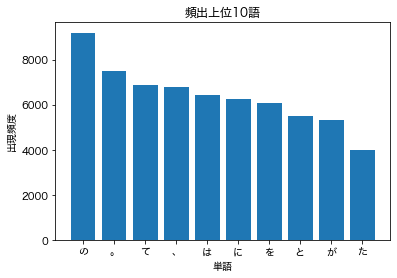

In [44]:
plt.rcParams["font.family"] = "Hiragino Sans"

data = np.array(vocab[:10])
label = np.array(data[:,0])
left = np.array(range(1,11))
height = np.array(list(map(int, data[:,1])))  # intに変換
plt.bar(left,height, tick_label=label,align="center")
plt.title('頻出上位10語')
plt.xlabel('単語')
plt.ylabel('出現頻度')

Text(0, 0.5, '出現頻度')

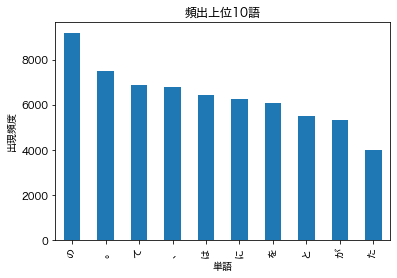

In [45]:
# pandasで
import pandas as pd
words,counts = zip(*vocab[:10])  # 要素が個々の引数としてzipに渡される
s = pd.Series(counts, index=words)  # 一次元配列を作成
s.plot.bar()
plt.title('頻出上位10語')
plt.xlabel('単語')
plt.ylabel('出現頻度')

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [47]:
co_neko_wordlist = []

for morphs in morphs_list:
    for morph in morphs:
        # 猫が出てきたらその文章の単語をco_neko_wordlistに追加
        if morph['surface'] == '猫':
            co_neko_wordlist.extend([morph['surface'] for morph in morphs if morph['surface'] != '猫'])
            break
co_neko_words = Counter(co_neko_wordlist).most_common(10)

print(co_neko_words)

[('の', 391), ('は', 272), ('、', 252), ('に', 250), ('を', 232), ('て', 229), ('。', 209), ('と', 202), ('が', 180), ('で', 170)]


Text(0, 0.5, '出現頻度')

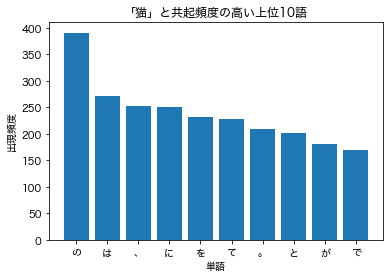

In [48]:
cowords,cocounts = zip(*co_neko_words)
plt.bar(cowords,cocounts)
plt.title('「猫」と共起頻度の高い上位10語')
plt.xlabel('単語')
plt.ylabel('出現頻度')

Text(0, 0.5, '出現頻度')

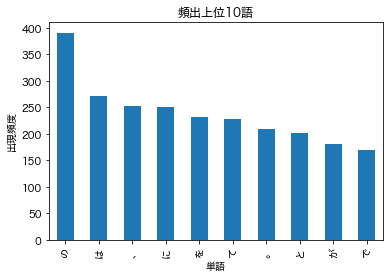

In [49]:
#pandasで
s = pd.Series(cocounts,index=cowords)
s.plot.bar()
plt.title('頻出上位10語')
plt.xlabel('単語')
plt.ylabel('出現頻度')

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

Text(0, 0.5, '単語の種類数')

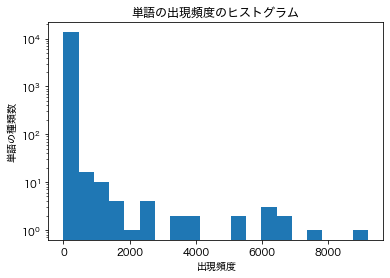

In [50]:
# bins:表示する棒の数
plt.hist([count for word,count in vocab], log=True, bins=20)
plt.title('単語の出現頻度のヒストグラム')
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

Text(0, 0.5, '出現頻度')

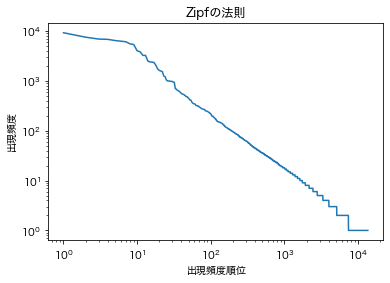

In [52]:
y = [count for word, count in vocab]  # 出現頻度
rank = list(range(1, len(vocab)+1))  # 出現頻度順位
plt.loglog(rank, y)
plt.title('Zipfの法則')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')